In [1]:
from os import path
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd

import numpy as np

from datetime import datetime, timezone
from dateutil import tz
import pytz

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

In [2]:
df = pd.read_csv("wattime_data.csv")
df["date"] = [datetime.fromisoformat(s[:-1]) for s in df["point_time"]]
df["date"] = [timestamp.tz_localize("America/Los_Angeles", ambiguous=0, nonexistent="shift_forward") for timestamp in df["date"]]
df["time"] = pd.DatetimeIndex(df['date']).time
df["year"] = [d.year for d in df["date"]]
df["month"] = [d.month for d in df["date"]]
df["day_of_month"] = pd.DatetimeIndex(df['date']).day
df["day_of_week"] = [datetime.weekday(d) for d in df["date"]]
df["day_of_week"] = df["day_of_week"].replace({0 : "Mon", 1 : "Tue", 2 : "Wed", 3 : "Thurs", 4 : "Fri", 5 : "Sat", 6 : "Sun"})
df["hour"] = [d.hour for d in df["time"]]
df["minute"] = [d.hour * 60 + d.minute for d in df["time"]]
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("point_time", axis=1)
df = df.rename(columns = {"value" : "MOER"})
df

,MOER,frequency,market,ba,datatype,version,date,time,year,month,day_of_month,day_of_week,hour,minute
0,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:00:00-08:00,00:00:00,2018,1,1,Mon,0,0
1,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:05:00-08:00,00:05:00,2018,1,1,Mon,0,5
2,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:10:00-08:00,00:10:00,2018,1,1,Mon,0,10
3,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:15:00-08:00,00:15:00,2018,1,1,Mon,0,15
4,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:20:00-08:00,00:20:00,2018,1,1,Mon,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499187,920.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:10:00-07:00,02:10:00,2022,9,30,Fri,2,130
499188,918.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:15:00-07:00,02:15:00,2022,9,30,Fri,2,135
499189,918.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:20:00-07:00,02:20:00,2022,9,30,Fri,2,140
499190,917.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:25:00-07:00,02:25:00,2022,9,30,Fri,2,145


## List of Highest MOERs

In [3]:
df.sort_values(by="MOER", ascending=False).head(20)

,MOER,frequency,market,ba,datatype,version,date,time,year,month,day_of_month,day_of_week,hour,minute
433489,1358.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:55:00-08:00,23:55:00,2022,2,13,Sun,23,1435
433488,1350.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:50:00-08:00,23:50:00,2022,2,13,Sun,23,1430
433487,1335.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:45:00-08:00,23:45:00,2022,2,13,Sun,23,1425
308483,1283.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-06 23:55:00-08:00,23:55:00,2020,12,6,Sun,23,1435
310494,1280.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:30:00-08:00,23:30:00,2020,12,13,Sun,23,1410
310496,1280.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:40:00-08:00,23:40:00,2020,12,13,Sun,23,1420
310491,1278.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:15:00-08:00,23:15:00,2020,12,13,Sun,23,1395
310493,1278.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:25:00-08:00,23:25:00,2020,12,13,Sun,23,1405
310495,1275.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:35:00-08:00,23:35:00,2020,12,13,Sun,23,1415
310500,1273.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-14 00:00:00-08:00,00:00:00,2020,12,14,Mon,0,0


In [4]:
df.sort_values(by="MOER").head(20)

,MOER,frequency,market,ba,datatype,version,date,time,year,month,day_of_month,day_of_week,hour,minute
262009,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:35:00-07:00,15:35:00,2020,6,28,Sun,15,935
262011,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:45:00-07:00,15:45:00,2020,6,28,Sun,15,945
262010,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:40:00-07:00,15:40:00,2020,6,28,Sun,15,940
262291,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-29 15:05:00-07:00,15:05:00,2020,6,29,Mon,15,905
262008,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:30:00-07:00,15:30:00,2020,6,28,Sun,15,930
262007,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:25:00-07:00,15:25:00,2020,6,28,Sun,15,925
262006,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:20:00-07:00,15:20:00,2020,6,28,Sun,15,920
262589,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-30 15:55:00-07:00,15:55:00,2020,6,30,Tue,15,955
262012,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:50:00-07:00,15:50:00,2020,6,28,Sun,15,950
262005,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:15:00-07:00,15:15:00,2020,6,28,Sun,15,915


## Looking at the distribution of MOER Values
- Large number of very low MOERs.
    - One thing we could do is to look at a dataset of just the very low MOERs and look and the conditions for then this occurs.
    
- Aside from this, there is a symmetrical distribution of MOER's with mu=950ish.

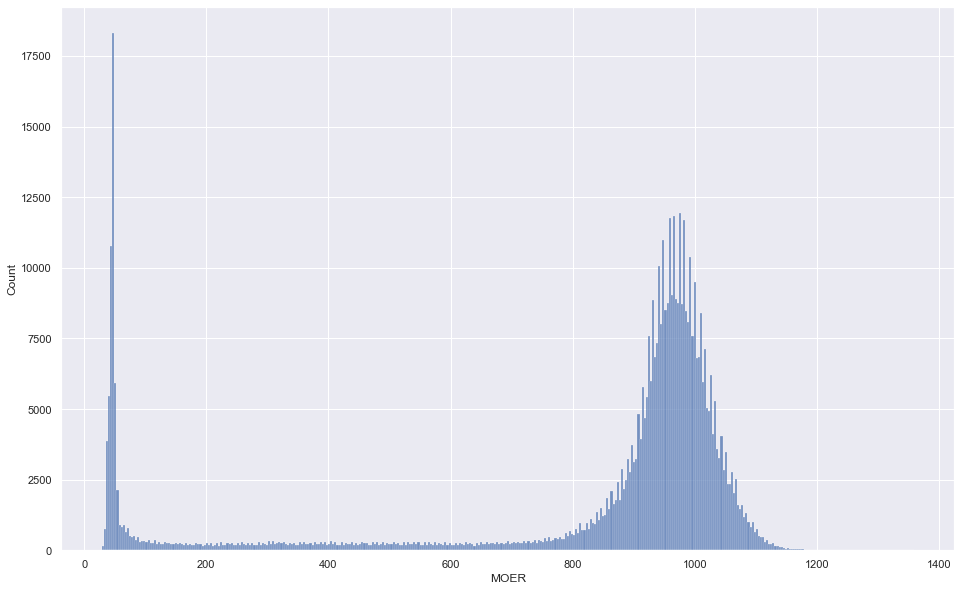

In [5]:
sns.set(rc={'figure.figsize':(16, 10)});
sns.histplot(data=df, x="MOER");

## Looking at MOERs by Day of Week
- Noticable drop during the weekends. 
- Monday and Friday are the lowest weekdays, which also makes sense (3-day weekends)

In [6]:
by_dow = df[["day_of_week", "MOER"]].groupby("day_of_week").mean()
by_dow["day_of_week"] = ["Mon", "Tues", "Wed", "Thu", "Fri", "Sat", "Sun"]
by_dow

,MOER,day_of_week
day_of_week,,
Fri,827.885706,Mon
Mon,823.780214,Tues
Sat,783.447549,Wed
Sun,763.188955,Thu
Thurs,835.044616,Fri
Tue,835.842592,Sat
Wed,834.640959,Sun


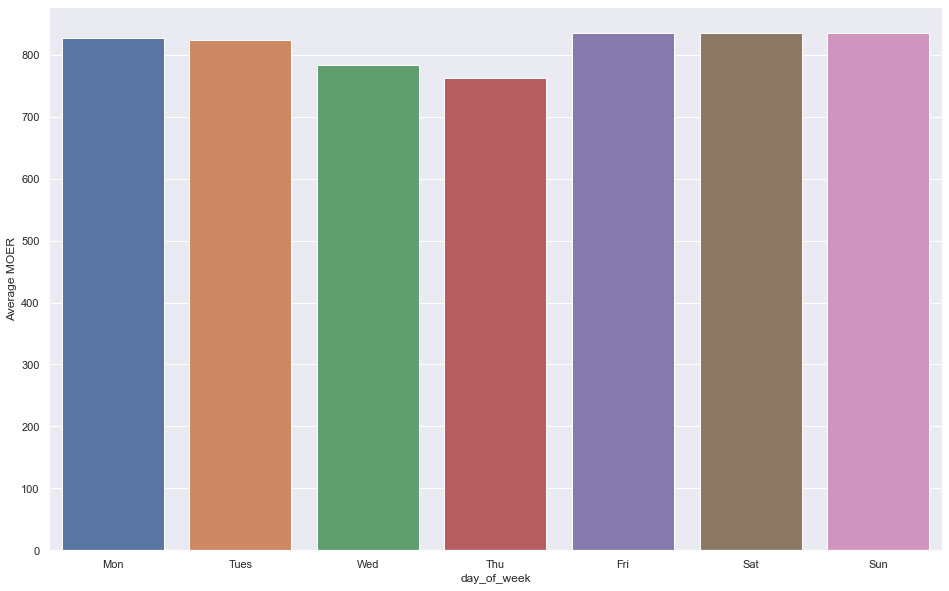

In [7]:
sns.barplot(data=by_dow, x="day_of_week", y="MOER")
plt.ylabel("Average MOER");

## Looking at Scatterplot of MOERs by Hour
- Pretty hard to tell what's going on here. But there seems to be an absence of low MOERs in between the hours of 3-12.

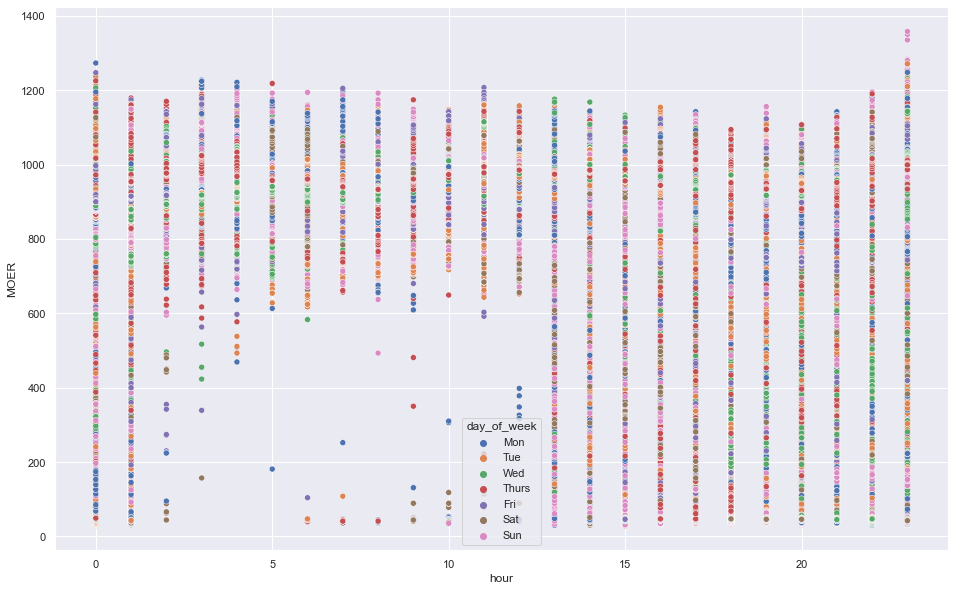

In [8]:
sns.scatterplot(data=df, x="hour", y="MOER", hue="day_of_week");

## Looking at MOER plots of the week of 1/11/21 (Monday) to 1/17/21 (Sunday):

Highest MOER: 1/12. Overcast. https://weatherspark.com/h/d/491/2021/1/12/Historical-Weather-on-Tuesday-January-12-2021-in-Berkeley-California-United-States#Figures-PrecipitationProbability

Lowest MOER: 1/17. Clear https://weatherspark.com/h/d/491/2021/1/17/Historical-Weather-on-Sunday-January-17-2021-in-Berkeley-California-United-States#Figures-CloudCover

This supports the hypothesis that weather is a predictor of MOER.

This data is smoothed for readability so that shadows represent a smoothed estimate for each hour.

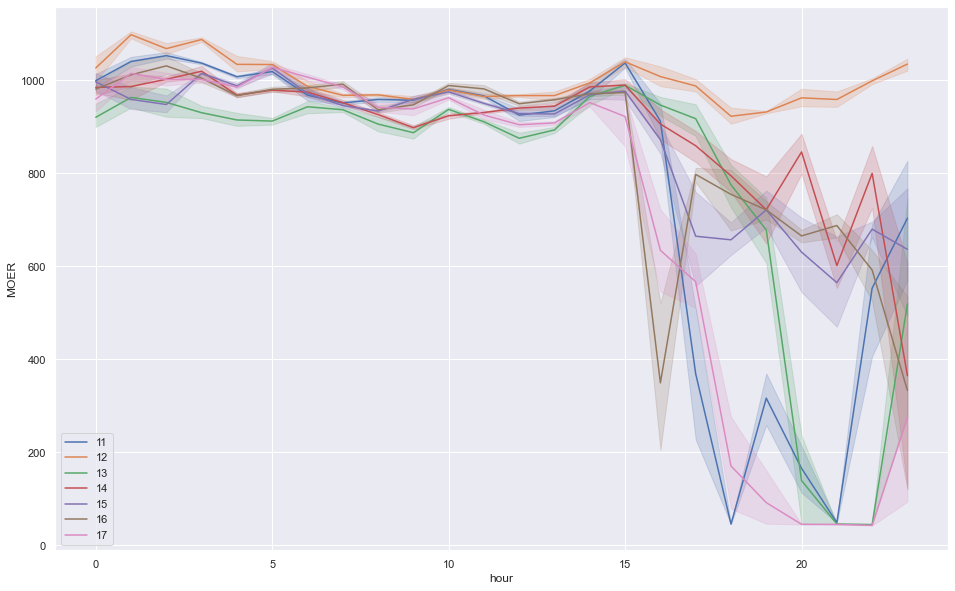

In [9]:
sns.set(rc={'figure.figsize':(16, 10)});
jan_21 = df[(df["year"] == 2021) & (df["month"] == 1)]
for i in range(11, 18):
    to_graph = jan_21[jan_21["day_of_month"] == i][["hour", "MOER"]].groupby("hour").mean()
    sns.lineplot(data = jan_21[jan_21["day_of_month"] == i], x="hour", y="MOER", label=i)

## Looking at CO2 rates by Month
* Hypothesis: months with the most moderate weather (Apr-Jun) have lowest MOER because residences don't need much heating or cooling. In peak summer and peak winter months MOERs are higher.

In [10]:
by_month = df[["month", "MOER"]].groupby("month").mean()
by_month

,MOER
month,
1,903.519453
2,842.991234
3,812.467040
4,689.094850
5,593.806518
6,696.708275
7,800.492328
8,871.368418
9,862.341157


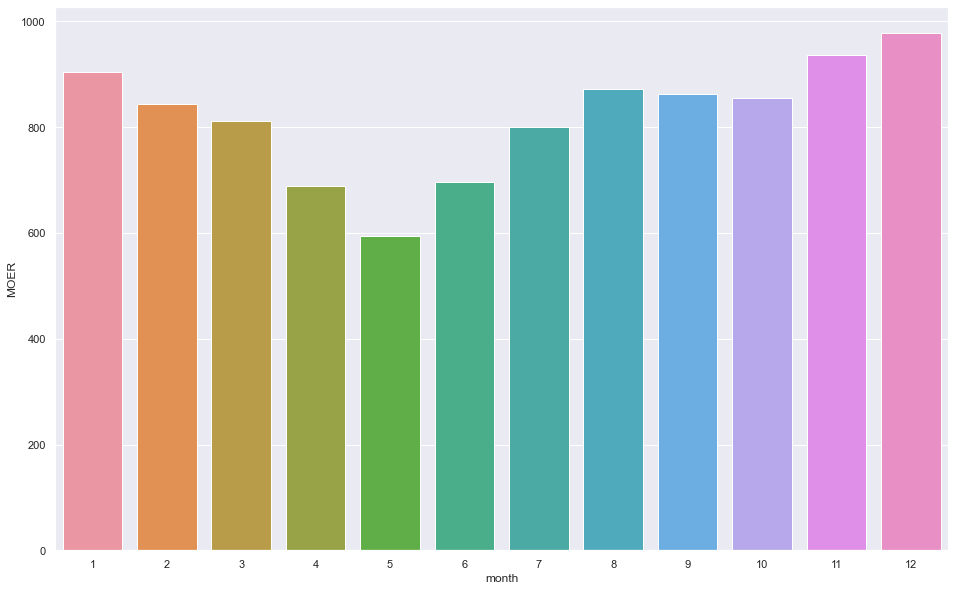

In [11]:
sns.barplot(data = by_month, x=by_month.index, y="MOER");

## Looking at most polluting hours of the week.
- Lowest average MOER: Sunday evenings between 5-7 PM. Saturday evenings between 5-7 PM are second place for lowest MOER. This is a time when the sun is still shining to make solar, and people are not working.
- Hghest average MOER: 11am-Noon, every day of the week.

In [12]:
df_hourly = df[df["minute"] % 60 == 0]
df_hourly

,MOER,frequency,market,ba,datatype,version,date,time,year,month,day_of_month,day_of_week,hour,minute
0,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:00:00-08:00,00:00:00,2018,1,1,Mon,0,0
12,1007.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 01:00:00-08:00,01:00:00,2018,1,1,Mon,1,60
24,1039.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 02:00:00-08:00,02:00:00,2018,1,1,Mon,2,120
36,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 03:00:00-08:00,03:00:00,2018,1,1,Mon,3,180
48,966.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 04:00:00-08:00,04:00:00,2018,1,1,Mon,4,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499137,943.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 22:00:00-07:00,22:00:00,2022,9,29,Thurs,22,1320
499149,986.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 23:00:00-07:00,23:00:00,2022,9,29,Thurs,23,1380
499161,997.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 00:00:00-07:00,00:00:00,2022,9,30,Fri,0,0
499173,900.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 01:00:00-07:00,01:00:00,2022,9,30,Fri,1,60


In [13]:
by_hour_of_week = df_hourly.groupby(["hour", "day_of_week"])[["MOER"]].mean()
by_hour_of_week.sort_values("MOER").head(20)

,,MOER
hour,day_of_week,
17,Sun,421.510121
18,Sun,432.133603
20,Sun,450.785425
19,Sun,455.012146
21,Sun,464.360324
19,Sat,473.161943
18,Sat,473.327935
16,Sun,479.939271
17,Sat,482.072874


In [14]:
by_hour_of_week.sort_values("MOER", ascending=True).sort_values("MOER", ascending=False).head(20)

MOER
hour day_of_week            
12   Sun          992.396761
     Sat          989.574899
     Thurs        988.806452
     Tue          988.576613
     Wed          987.745968
11   Sun          986.251012
12   Mon          986.137097
11   Tue          985.987903
     Wed          985.758065
     Mon          984.536290
     Thurs        984.407258
12   Fri          983.165992
11   Fri          979.275304
4    Wed          974.366935
10   Tue          974.068548
4    Thurs        974.060484
11   Sat          974.056680
4    Tue          973.068548
10   Sun          972.720648
     Wed          971.314516

## Looking at the best/worst months in the past 5 years.
-Worst month (by far) was December 2019. Winter 2018-219 and Winter 2019-2020 are the worst.

-Hypothesis: coldest and wettest weather in the last 5 years. Check out the chart here (https://ggweather.com/enso/oni.htm) that has a graph of El Nino vs. La Nina weather patterns in the past 5 years. 

In [15]:
by_month_and_year = df_hourly.groupby(["month", "year"])[["MOER"]].mean()
by_month_and_year.sort_values("MOER", ascending=False).head(20)

MOER
month year             
12    2019  1021.806711
11    2019   984.828017
12    2018   983.421477
      2021   960.836242
11    2018   955.880721
12    2020   945.920805
1     2019   938.459060
      2020   936.480537
2     2019   925.332838
10    2020   923.504698
11    2021   922.520111
1     2018   922.260403
9     2021   906.386963
8     2022   905.697987
      2018   904.562416
9     2022   887.617143
7     2021   885.684564
11    2020   882.517337
8     2021   874.514094
1     2022   874.217450

In [16]:
by_month_and_year.sort_values("MOER").head(20)

MOER
month year            
5     2020  537.551678
      2019  555.118121
      2022  570.586577
      2018  574.750336
6     2020  595.629681
      2019  599.471567
4     2018  605.595007
7     2020  642.263087
6     2018  645.074896
4     2019  647.196949
      2020  655.431345
      2022  700.294036
5     2021  705.084564
6     2022  731.427184
2     2021  749.132244
7     2019  770.761074
3     2018  783.027778
8     2020  785.326174
3     2020  786.267196
10    2021  808.530201

## Have MOERs fallen in the past 5 years?
- Answer: not discernably. 
- Hypothesis: since MOER is a marginal quantity, even if CA built more solar panels in the last 5 years, it may not affect the cost of producing 1 additional kWH.

In [17]:
by_year = df_hourly.groupby("year")[["MOER"]].mean()
by_year = by_year.sort_values("year", ascending=False).head(20)

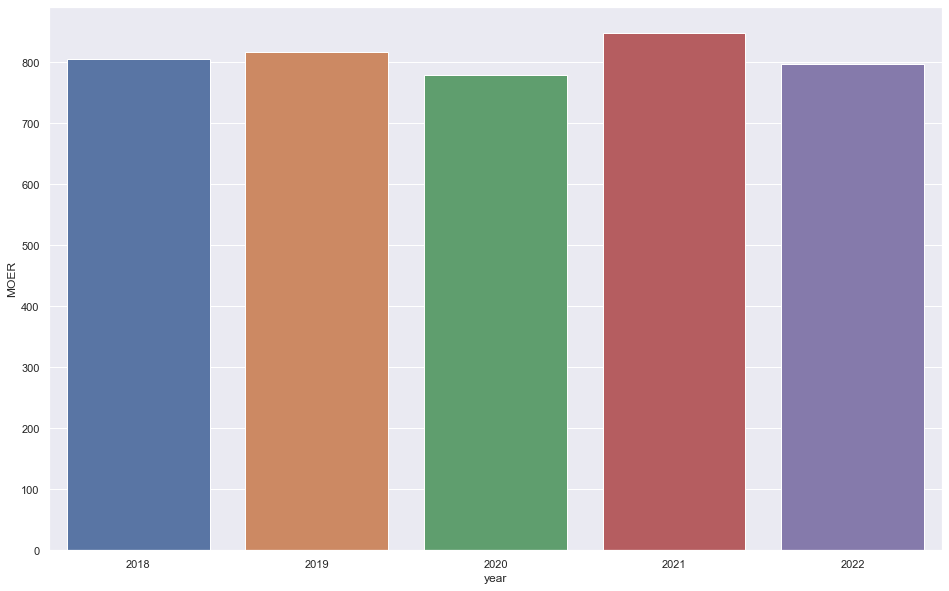

In [18]:
sns.barplot(data=by_year, x=by_year.index, y="MOER");

## Analysis of Times when the MOER is very low
* Low MOER readings are concentrated in March-June
* Low MOER readings often happen on the weekends in the late afternoons.  

In [19]:
low_moers = df[df["MOER"] < 100]
low_moers

,MOER,frequency,market,ba,datatype,version,date,time,year,month,day_of_month,day_of_week,hour,minute
1357,47.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:00:00-08:00,17:00:00,2018,1,5,Fri,17,1020
1358,88.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:05:00-08:00,17:05:00,2018,1,5,Fri,17,1025
1359,74.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:10:00-08:00,17:10:00,2018,1,5,Fri,17,1030
1363,88.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:30:00-08:00,17:30:00,2018,1,5,Fri,17,1050
1364,88.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:35:00-08:00,17:35:00,2018,1,5,Fri,17,1055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499070,47.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 16:25:00-07:00,16:25:00,2022,9,29,Thurs,16,985
499079,47.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 17:10:00-07:00,17:10:00,2022,9,29,Thurs,17,1030
499080,47.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 17:15:00-07:00,17:15:00,2022,9,29,Thurs,17,1035
499081,61.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 17:20:00-07:00,17:20:00,2022,9,29,Thurs,17,1040


In [20]:
count_low_moers_by_month = low_moers.groupby("month")[["time"]].count().rename(columns={"time" : "count"})
count_low_moers_by_month

,count
month,
1,2132
2,4209
3,5610
4,9924
5,12453
6,7192
7,3810
8,1854
9,2461


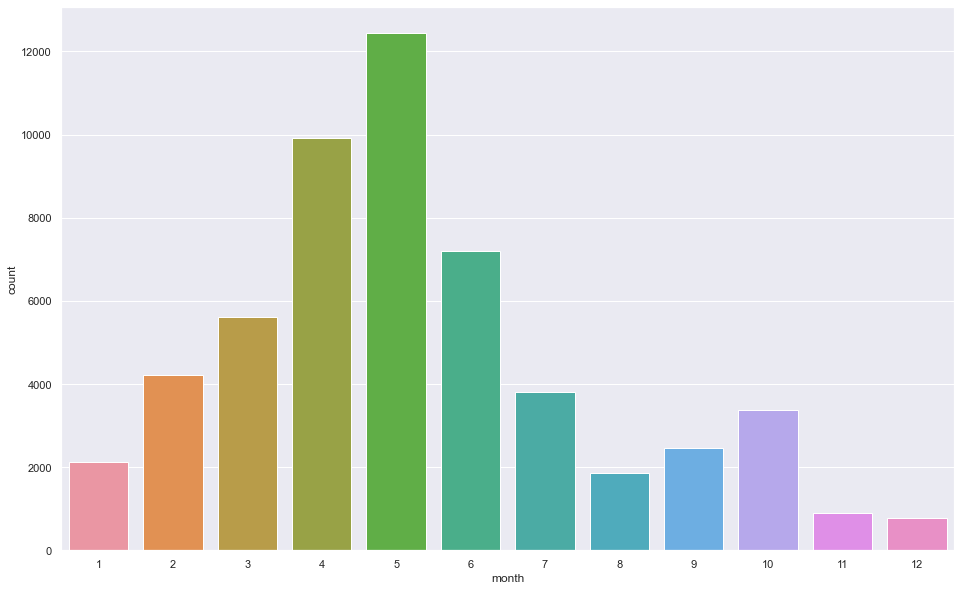

In [21]:
sns.barplot(data=count_low_moers_by_month, x=count_low_moers_by_month.index, y="count");

In [22]:
low_moers_hourly = low_moers[low_moers["minute"] % 60 == 0]
low_moers_by_hour_of_week = low_moers_hourly.groupby(["hour", "day_of_week"])[["time"]].count().rename(columns={"time" : "count"})
low_moers_by_hour_of_week.sort_values("count", ascending=False).head(20)

,,count
hour,day_of_week,
17,Sun,115
18,Sun,112
20,Sun,109
19,Sun,107
21,Sun,104
19,Sat,100
22,Sun,98
17,Sat,98
16,Sun,97
